<a href="https://colab.research.google.com/github/sahasus/Stock-Price-Predicton-using-LSTM/blob/main/Stock_price_prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stock.csv to stock.csv


In [ ]:
import io
stock_price_df = pd.read_csv(io.BytesIO(uploaded['stock.csv']))

In [ ]:
stock_price_df = stock_price_df.sort_values(by = ['Date'])
stock_price_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
stock_price_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [ ]:
stock_price_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [ ]:
stock_new_df=pd.DataFrame({'Date': stock_price_df['Date'], 'Close': stock_price_df['sp500']})
stock_new_df

,Date,Close
0,2012-01-12,1295.500000
1,2012-01-13,1289.089966
2,2012-01-17,1293.670044
3,2012-01-18,1308.040039
4,2012-01-19,1314.500000
...,...,...
2154,2020-08-05,3327.770020
2155,2020-08-06,3349.159912
2156,2020-08-07,3351.280029
2157,2020-08-10,3360.469971


In [ ]:
df1_1=stock_new_df.reset_index()['Close']
df1_1

0       1295.500000
1       1289.089966
2       1293.670044
3       1308.040039
4       1314.500000
           ...     
2154    3327.770020
2155    3349.159912
2156    3351.280029
2157    3360.469971
2158    3333.689941
Name: Close, Length: 2159, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1_1).reshape(-1,1))
df1

array([[0.00828228],
       [0.00524163],
       [0.00741423],
       ...,
       [0.98345918],
       [0.9878185 ],
       [0.97511517]])

In [ ]:
x=df1[:,:1]

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
test_size

756

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
import numpy

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 4s 209ms/step - loss: 5.4203e-05 - val_loss: 5.4847e-04
Epoch 2/100
21/21 [==============================] - 4s 207ms/step - loss: 5.3788e-05 - val_loss: 5.7005e-04
Epoch 3/100
21/21 [==============================] - 4s 212ms/step - loss: 5.4691e-05 - val_loss: 5.3351e-04
Epoch 4/100
21/21 [==============================] - 7s 346ms/step - loss: 5.2556e-05 - val_loss: 5.5195e-04
Epoch 5/100
21/21 [==============================] - 7s 328ms/step - loss: 5.5839e-05 - val_loss: 5.6361e-04
Epoch 6/100
21/21 [==============================] - 4s 212ms/step - loss: 5.1397e-05 - val_loss: 5.2906e-04
Epoch 7/100
21/21 [==============================] - 4s 212ms/step - loss: 5.0780e-05 - val_loss: 5.3028e-04
Epoch 8/100
21/21 [==============================] - 4s 207ms/step - loss: 5.8463e-05 - val_loss: 5.4466e-04
Epoch 9/100
21/21 [==============================] - 4s 213ms/step - loss: 7.0043e-05 - val_loss: 5.3421e-04
Epoch 10/100
21/21 

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(y_pred_train)
test_predict=scaler.inverse_transform(y_pred_test)

In [ ]:
from sklearn import metrics

In [ ]:
#for epoch_25 loss 2.735e-04
print("Mean squared error (MSE) =", metrics.mean_squared_error(ytest,y_pred_test ))
print("Mean absolute error (MAE) =", metrics.mean_absolute_error(ytest, y_pred_test))
print("R^2 =", metrics.r2_score(ytest, y_pred_test))

Mean squared error (MSE) = 0.0020036975326613946
Mean absolute error (MAE) = 0.029961067212587435
R^2 = 0.7905688130605638


In [ ]:
#for epoch 50 loss 1.2890e-04
print("Mean squared error (MSE) =", metrics.mean_squared_error(ytest,y_pred_test ))
print("Mean absolute error (MAE) =", metrics.mean_absolute_error(ytest, y_pred_test))
print("R^2 =", metrics.r2_score(ytest, y_pred_test))

Mean squared error (MSE) = 0.0009658368573136636
Mean absolute error (MAE) = 0.020103754564851507
R^2 = 0.8990484561068538


In [ ]:
#for epoch 100 loss 5.26e-05 
print("Mean squared error (MSE) =", metrics.mean_squared_error(ytest,y_pred_test ))
print("Mean absolute error (MAE) =", metrics.mean_absolute_error(ytest, y_pred_test))
print("R^2 =", metrics.r2_score(ytest, y_pred_test))

Mean squared error (MSE) = 0.0005424783605857256
Mean absolute error (MAE) = 0.015580760995395413
R^2 = 0.9432988836416223


In [ ]:
#for epoch 200 loss 5.035e-05
print("Mean squared error (MSE) =", metrics.mean_squared_error(ytest,y_pred_test ))
print("Mean absolute error (MAE) =", metrics.mean_absolute_error(ytest, y_pred_test))
print("R^2 =", metrics.r2_score(ytest, y_pred_test))

Mean squared error (MSE) = 0.0005391527764992948
Mean absolute error (MAE) = 0.014319401446797376
R^2 = 0.9436464815256018


In [ ]:
ytest_2=np.array(ytest).reshape(-1,1)
ytest_2.shape

(655, 1)

In [ ]:
ytest_2=scaler.inverse_transform(ytest_2)

Text(0.5, 1.0, 'sp500 Stock Price Prediction')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'sp500 Stock Price')

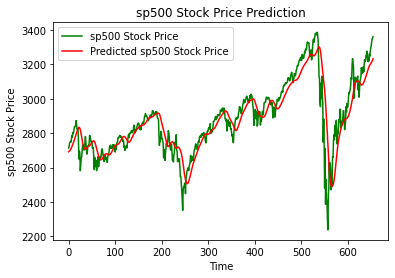

In [ ]:
#for 25 epoch
plt.plot(ytest_2, color = 'green', label = 'sp500 Stock Price')
plt.plot(test_predict, color = 'red', label = 'Predicted sp500 Stock Price')
plt.title('sp500 Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('sp500 Stock Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'sp500 Stock Price Prediction for 50epoch')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'sp500 Stock Price')

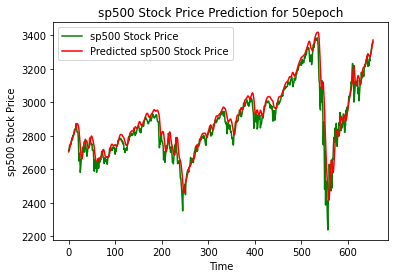

In [ ]:
#for 50 epoch
plt.plot(ytest_2, color = 'green', label = 'sp500 Stock Price')
plt.plot(test_predict, color = 'red', label = 'Predicted sp500 Stock Price')
plt.title('sp500 Stock Price Prediction for 50epoch')
plt.xlabel('Time')
plt.ylabel('sp500 Stock Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'sp500 Stock Price Prediction for 100 epoch')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'sp500 Stock Price')

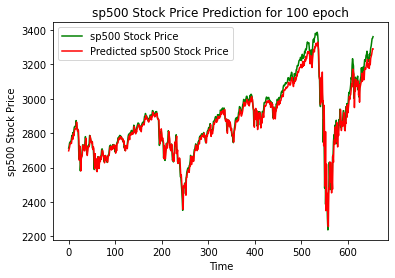

In [ ]:
#for 100 epoch
plt.plot(ytest_2, color = 'green', label = 'sp500 Stock Price')
plt.plot(test_predict, color = 'red', label = 'Predicted sp500 Stock Price')
plt.title('sp500 Stock Price Prediction for 100 epoch')
plt.xlabel('Time')
plt.ylabel('sp500 Stock Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'sp500 Stock Price Prediction for 200 epoch')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'sp500 Stock Price')

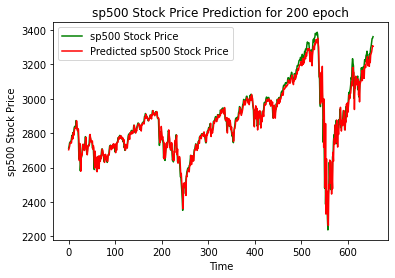

In [ ]:
#for 200 epoch
plt.plot(ytest_2, color = 'green', label = 'sp500 Stock Price')
plt.plot(test_predict, color = 'red', label = 'Predicted sp500 Stock Price')
plt.title('sp500 Stock Price Prediction for 200 epoch')
plt.xlabel('Time')
plt.ylabel('sp500 Stock Price')
plt.legend()
plt.show()

In [ ]:
# for predicted next 10 days value... 100 epoch
len(test_data)

756

In [ ]:
x_input=test_data[656:]
x_input.shape

(100, 1)

In [ ]:
x_input=test_data[655:].reshape(1,-1)
x_input.shape

(1, 101)

In [ ]:
len(x_input)

1

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

In [ ]:
x_input.shape

(1, 101)

In [ ]:
# demonstrate prediction for next 30 days
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.48710928 0.45508058 0.55466276 0.5680539  0.64134704 0.59931883
 0.63972466 0.61977323 0.56565361 0.59240739 0.57426317 0.65729017
 0.65526465 0.69822734 0.71712583 0.70375357 0.74380375 0.71406149
 0.72174133 0.75732297 0.73294087 0.69186148 0.72162749 0.7209112
 0.73938269 0.75918242 0.7520243  0.78813254 0.77528687 0.7365223
 0.74222885 0.75441984 0.74492317 0.76046791 0.78352653 0.78371148
 0.75521684 0.73144194 0.74685859 0.75217138 0.79496325 0.78027238
 0.80335949 0.79240176 0.79569378 0.81292252 0.833965   0.83092915
 0.83784534 0.84326248 0.85516417 0.87511098 0.87012071 0.90881881
 0.92706262 0.91510406 0.90702097 0.81782268 0.83642226 0.84841406
 0.87599797 0.87066143 0.87153904 0.86319028 0.87273443 0.87910504
 0.84070099 0.85655876 0.82111945 0.84208133 0.86439992 0.87178572
 0.87849784 0.90207819 0.8857603  0.89743895 0.88895273 0.90460181
 0.89045641 0.9105218  0.92429719 0.91908399 0.92342908 0.93628899
 0.93887897 0.94775895 0.92861378 0.91911237 0.93039

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)-100

2059

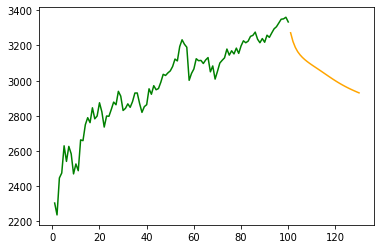

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[2059:]) , color="green")
plt.plot(day_pred,scaler.inverse_transform(lst_output) , color = "orange")

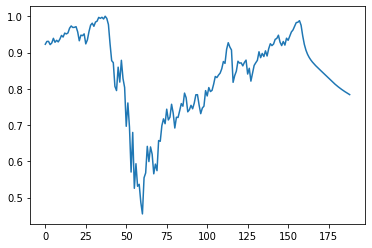

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])